# Congressional Speech Analysis

### 1. Data import

In [1]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import pandas as pd
# its necessary to run --> pip3 install xlrd==1.2.0               
df_charisma_analysis=pd.read_excel("charisma_analisis_complete_df.xlsx", header=0)
df_congress_114_bills=pd.read_excel("congress_114_bills_df_new.xlsx",header=0)
print(f'''charisma_analisis_complete has {df_charisma_analysis.shape[0]} Rows, and {df_charisma_analysis.shape[1]} Columns''')
print(f'''congress_114_bills has {df_congress_114_bills.shape[0]} Rows, and {df_congress_114_bills.shape[1]} Columns''')

charisma_analisis_complete has 10938 Rows, and 175 Columns
congress_114_bills has 3886 Rows, and 25 Columns


---
### 2. Merging Data

##### 2.1 By unique_speeche_id

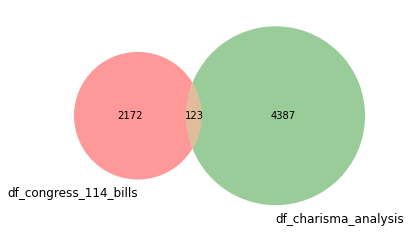

The numbers are the count of unique_speeche_id uniques


In [2]:
df_merge_1=pd.merge(df_congress_114_bills, df_charisma_analysis,on='unique_speech_id')
df_merge_2=pd.merge(df_congress_114_bills,df_charisma_analysis,on='unique_speech_id',how='left')
df_merge_3=pd.merge(df_congress_114_bills,df_charisma_analysis,on='unique_speech_id',how='right')

inter=len(df_merge_1.unique_speech_id.value_counts())
left=len(df_merge_2.unique_speech_id.value_counts())-inter
right=len(df_merge_3.unique_speech_id.value_counts())-inter
venn2(subsets = (left, right, inter),set_labels = ('df_congress_114_bills', 'df_charisma_analysis'))
plt.show()
print("The numbers are the count of unique_speeche_id uniques")

In [3]:
# checking differences in repeted Cols in db_merge_1
repeted_cols=[x for x in df_merge_1.columns.values if x[-2:]=="_x"]
check_repeted= [sum(df_merge_1[[x,x[:-2]+'_y']].apply(lambda x:x[0]!=x[1] )) for x in repeted_cols]
print(check_repeted)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [4]:
df_merge_1.to_csv('df_merge_unique_speeche_id.csv',index=False)

##### 2.2 By document_id

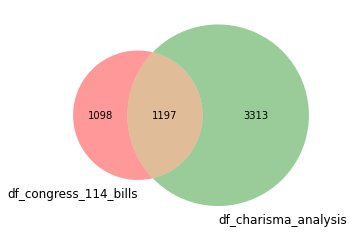

The numbers are the count of unique_speeche_id uniques


In [5]:
df_merge_1=pd.merge(df_congress_114_bills, df_charisma_analysis,on='document_id')
df_merge_2=pd.merge(df_congress_114_bills,df_charisma_analysis,on='document_id',how='left')
df_merge_3=pd.merge(df_congress_114_bills,df_charisma_analysis,on='document_id',how='right')

inter=len(df_merge_1.unique_speech_id_x.value_counts())
left=len(df_merge_2.unique_speech_id_x.value_counts())-inter
right=len(df_merge_3.unique_speech_id_y.value_counts())-inter
venn2(subsets = (left, right, inter),set_labels = ('df_congress_114_bills', 'df_charisma_analysis'))
plt.show()
print("The numbers are the count of unique_speeche_id uniques")

In [6]:
# checking differences in repeted Cols in db_merge_1
repeted_cols=[x for x in df_merge_1.columns.values if x[-2:]=="_x"]
check_repeted= dict( (x,sum(df_merge_1[[x,x[:-2]+'_y']].apply(lambda x:x[0]!=x[1]))) for x in repeted_cols)

print("There are some items that have different values in both tables when merge:")
print({k: v for k, v in check_repeted.items() if v>0} )


There are some items that have different values in both tables when merge:
{'speech_id_x': 1, 'unique_speech_id_x': 1, 'clean_speaker_name_x': 1, 'speech_len_x': 1}


In [7]:
# Export the data
df_merge_1.to_csv('df_merge_document_id.csv',index=False)